In [1]:
from src.data.save_tar_gz import tar_gz_to_csv
from src.data.load_data import load_data_from_csv
from src.utils.data_utils import *
from src.data.additional_data import *
import warnings
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import src.data.wrangling as wrangling

In [2]:
Ratebeer_path = lambda path: f"{path}/Ratebeer"
BeerAdvocate_path = lambda path: f"{path}/BeerAdvocate"
Matched_path = lambda path: f"{path}/MatchedBeerData"
clean_path = "data/clean"

In [3]:
ba_beers = pd.read_csv(f"{BeerAdvocate_path(clean_path)}/beers.csv")

In [4]:
pd.set_option('display.max_columns', None)
ba_beers.head(10)

,Unnamed: 0,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,avg_nan,ba_score_nan,bros_score_nan,abv_nan,avg_computed_nan,zscore_nan,avg_matched_valid_ratings_nan
0,0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,0.0,0.0,0.0,4.7,0.0,0.0,0,0.0,1,1,1,0,1,1,1
1,1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,0.0,0.0,0.0,3.8,0.0,0.0,0,0.0,1,1,1,0,1,1,1
2,2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,0.0,0.0,0.0,4.8,0.0,0.0,0,0.0,1,1,1,0,1,1,1
3,3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,0.0,0.0,0.0,4.0,0.0,0.0,0,0.0,1,1,1,0,1,1,1
4,4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,0.0,0.0,0.0,4.5,0.0,0.0,0,0.0,1,1,1,0,1,1,1
5,5,166068,Arpa,39913,Arpa (АРПА),Euro Pale Lager,0,0,0.0,0.0,0.0,4.0,0.0,0.0,0,0.0,1,1,1,0,1,1,1
6,6,166071,Eles,39914,Bear Beer,Euro Pale Lager,0,0,0.0,0.0,0.0,4.0,0.0,0.0,0,0.0,1,1,1,0,1,1,1
7,7,166072,Eles Light,39914,Bear Beer,Euro Pale Lager,0,0,0.0,0.0,0.0,3.2,0.0,0.0,0,0.0,1,1,1,0,1,1,1
8,8,166074,Toroz Svetloye,39914,Bear Beer,American Pale Lager,0,0,0.0,0.0,0.0,4.5,0.0,0.0,0,0.0,1,1,1,0,1,1,1
9,9,166076,Toroz Temnoye,39914,Bear Beer,Euro Dark Lager,0,0,0.0,0.0,0.0,4.1,0.0,0.0,0,0.0,1,1,1,0,1,1,1


In [5]:
ba_usa_ratings = pd.read_csv(f"{BeerAdvocate_path(clean_path)}/usa_ratings.csv")
ba_usa_ratings.head(10)

,Unnamed: 0,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,user_name_nan,abv_nan,appearance_nan,aroma_nan,palate_nan,taste_nan,overall_nan
0,0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.00,2.88,0,0,0,0,0,0,0
1,1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.50,3.67,0,0,0,0,0,0,0
2,5,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1417431600,Hellpop65,hellpop65.48993,0.00,0.00,0.00,0.00,0.00,3.25,0,0,1,1,1,1,1
3,6,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1401357600,Latarnik,latarnik.52897,0.00,0.00,0.00,0.00,0.00,3.50,0,0,1,1,1,1,1
4,7,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1393412400,RochefortChris,rochefortchris.697017,0.00,0.00,0.00,0.00,0.00,3.50,0,0,1,1,1,1,1
5,8,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1392030000,OKCNittany,okcnittany.144868,0.00,0.00,0.00,0.00,0.00,3.75,0,0,1,1,1,1,1
6,9,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1390647600,jaydoc,jaydoc.265507,0.00,0.00,0.00,0.00,0.00,3.25,0,0,1,1,1,1,1
7,10,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1380794400,ejimhof,ejimhof.5743,0.00,0.00,0.00,0.00,0.00,3.00,0,0,1,1,1,1,1
8,11,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1366884000,GraduatedCashew,graduatedcashew.730089,0.00,0.00,0.00,0.00,0.00,3.00,0,0,1,1,1,1,1
9,12,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1360753200,brewdude1982,brewdude1982.691169,4.25,4.50,3.25,3.75,3.75,3.91,0,0,0,0,0,0,0


In [6]:
ba_usa_users = pd.read_csv(f"{BeerAdvocate_path(clean_path)}/usa_users.csv")


In [7]:
ba_usa_users.head(10)

,Unnamed: 0,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,5,2326,0,hellpop65.48993,Hellpop65,1.131966e+09,"United States, Kansas"
3,6,3098,0,latarnik.52897,Latarnik,1.133521e+09,"United States, New Jersey"
4,7,1866,23,rochefortchris.697017,RochefortChris,1.349172e+09,"United States, North Carolina"
5,8,1131,188,okcnittany.144868,OKCNittany,1.182766e+09,"United States, Oklahoma"
6,9,9987,16,jaydoc.265507,jaydoc,1.226488e+09,"United States, Kansas"
7,10,4078,127,ejimhof.5743,ejimhof,1.081764e+09,"United States, Pennsylvania"
8,11,2329,5,graduatedcashew.730089,GraduatedCashew,1.366884e+09,"United States, California"
9,12,264,95,brewdude1982.691169,brewdude1982,1.345802e+09,"United States, North Carolina"


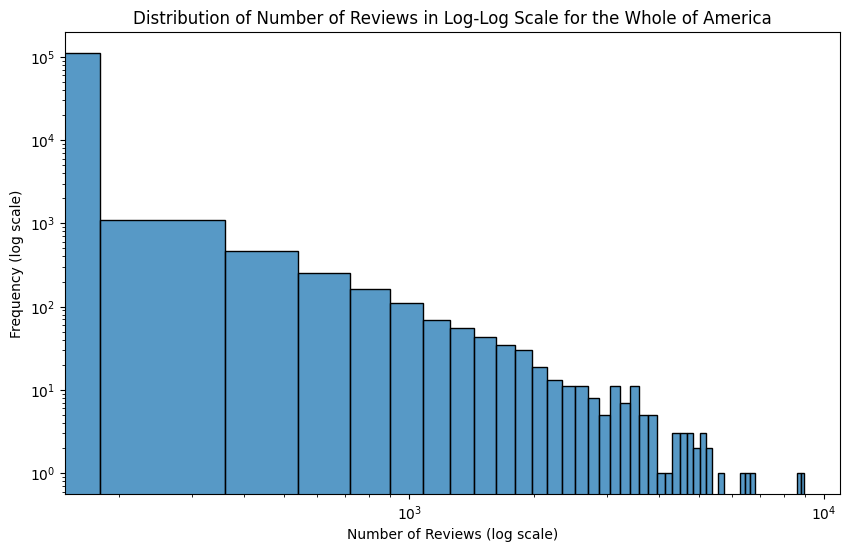

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the distribution of nbr_reviews in log-log scale
plt.figure(figsize=(10, 6))
sns.histplot(ba_usa_users['nbr_reviews'], bins=50, kde=False)

# Set x-axis and y-axis to log-log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Number of Reviews (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Number of Reviews in Log-Log Scale for the Whole of America')

# Show the plot
plt.show()

In [9]:
ba_usa_ratings = ba_usa_ratings.merge(ba_usa_users[['user_id', 'location']], on='user_id', how='left')
ba_usa_ratings.head(10)

,Unnamed: 0,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,user_name_nan,abv_nan,appearance_nan,aroma_nan,palate_nan,taste_nan,overall_nan,location
0,0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.00,2.88,0,0,0,0,0,0,0,"United States, Washington"
1,1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.50,3.67,0,0,0,0,0,0,0,"United States, New York"
2,5,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1417431600,Hellpop65,hellpop65.48993,0.00,0.00,0.00,0.00,0.00,3.25,0,0,1,1,1,1,1,"United States, Kansas"
3,6,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1401357600,Latarnik,latarnik.52897,0.00,0.00,0.00,0.00,0.00,3.50,0,0,1,1,1,1,1,"United States, New Jersey"
4,7,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1393412400,RochefortChris,rochefortchris.697017,0.00,0.00,0.00,0.00,0.00,3.50,0,0,1,1,1,1,1,"United States, North Carolina"
5,8,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1392030000,OKCNittany,okcnittany.144868,0.00,0.00,0.00,0.00,0.00,3.75,0,0,1,1,1,1,1,"United States, Oklahoma"
6,9,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1390647600,jaydoc,jaydoc.265507,0.00,0.00,0.00,0.00,0.00,3.25,0,0,1,1,1,1,1,"United States, Kansas"
7,10,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1380794400,ejimhof,ejimhof.5743,0.00,0.00,0.00,0.00,0.00,3.00,0,0,1,1,1,1,1,"United States, Pennsylvania"
8,11,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1366884000,GraduatedCashew,graduatedcashew.730089,0.00,0.00,0.00,0.00,0.00,3.00,0,0,1,1,1,1,1,"United States, California"
9,12,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1360753200,brewdude1982,brewdude1982.691169,4.25,4.50,3.25,3.75,3.75,3.91,0,0,0,0,0,0,0,"United States, North Carolina"


In [10]:
census_data = pd.read_csv("data/raw/Census/DECENNIALCD1162010.H2_rural_urban_US.csv")
census_data.head(10)

,Label (Grouping),Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
0,Total:,"2,171,853 (r15032)","306,967 (r15611)","2,844,526","1,316,299 (r15934)","13,680,081","2,212,898","1,487,891","405,885","296,719 (r16187)","8,989,580 (r16882)","4,088,801 (r17732)","519,508","667,796","5,296,715","2,795,541","1,336,417","1,233,215","1,927,164","1,964,981","721,830","2,378,814 (r18611)","2,808,254","4,532,233 (r21600)","2,347,201","1,274,719","2,712,729","482,825","796,793","1,173,814","614,754","3,553,562 (r22677)","901,388 (r23120)","8,108,103","4,327,528","317,498","5,127,508 (r23694)","1,664,378","1,675,562","5,567,315","463,388","2,137,683","363,438 (r24270)","2,812,133","9,977,436 (r24592)","979,709","322,539","3,364,939","2,885,677","881,917","2,624,358","261,868","1,636,946 (r25701)"
1,Urban:,"1,267,224","182,989","2,515,504","720,584","12,814,688","1,838,986","1,308,541","339,111","296,719","8,190,007","3,021,219","465,032","447,466","4,653,006","2,045,946","848,403","900,963","1,117,530","1,435,286","251,161","2,073,112","2,566,340","3,256,662","1,638,077","626,138","1,881,796","251,958","564,143","1,097,550","343,920","3,373,106","677,019","6,935,786","2,787,646","182,040","4,074,109","1,091,090","1,328,268","4,316,955","419,181","1,423,307","200,981","1,845,423","8,280,411","848,925","106,561","2,458,130","2,379,818","424,443","1,743,597","162,874","1,529,804"
2,Inside urbanized areas,"1,040,659","123,286","2,242,637","506,573","12,051,891","1,617,575","1,259,361","251,189","296,719","7,868,477","2,627,344","343,223","320,550","4,175,309","1,661,795","542,462","609,736","779,669","1,211,651","166,873","1,953,855","2,504,170","2,887,280","1,289,593","352,526","1,519,706","116,980","409,695","999,698","265,821","3,286,946","467,906","6,492,127","2,280,125","122,440","3,424,890","750,131","1,018,953","3,868,362","416,552","1,203,977","105,088","1,506,349","7,328,804","753,757","45,774","2,256,078","2,123,384","289,445","1,378,190","61,697","1,480,462"
3,Inside urban clusters,"226,565","59,703","272,867","214,011","762,797","221,411","49,180","87,922",0,"321,530","393,875","121,809","126,916","477,697","384,151","305,941","291,227","337,861","223,635","84,288","119,257","62,170","369,382","348,484","273,612","362,090","134,978","154,448","97,852","78,099","86,160","209,113","443,659","507,521","59,600","649,219","340,959","309,315","448,593","2,629","219,330","95,893","339,074","951,607","95,168","60,787","202,052","256,434","134,998","365,407","101,177","49,342"
4,Rural,"904,629","123,978","329,022","595,715","865,393","373,912","179,350","66,774",0,"799,573","1,067,582","54,476","220,330","643,709","749,595","488,014","332,252","809,634","529,695","470,669","305,702","241,914","1,275,571","709,124","648,581","830,933","230,867","232,650","76,264","270,834","180,456","224,369","1,172,317","1,539,882","135,458","1,053,399","573,288","347,294","1,250,360","44,207","714,376","162,457","966,710","1,697,025","130,784","215,978","906,809","505,859","457,474","880,761","98,994","107,142"
5,Not defined for this file,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


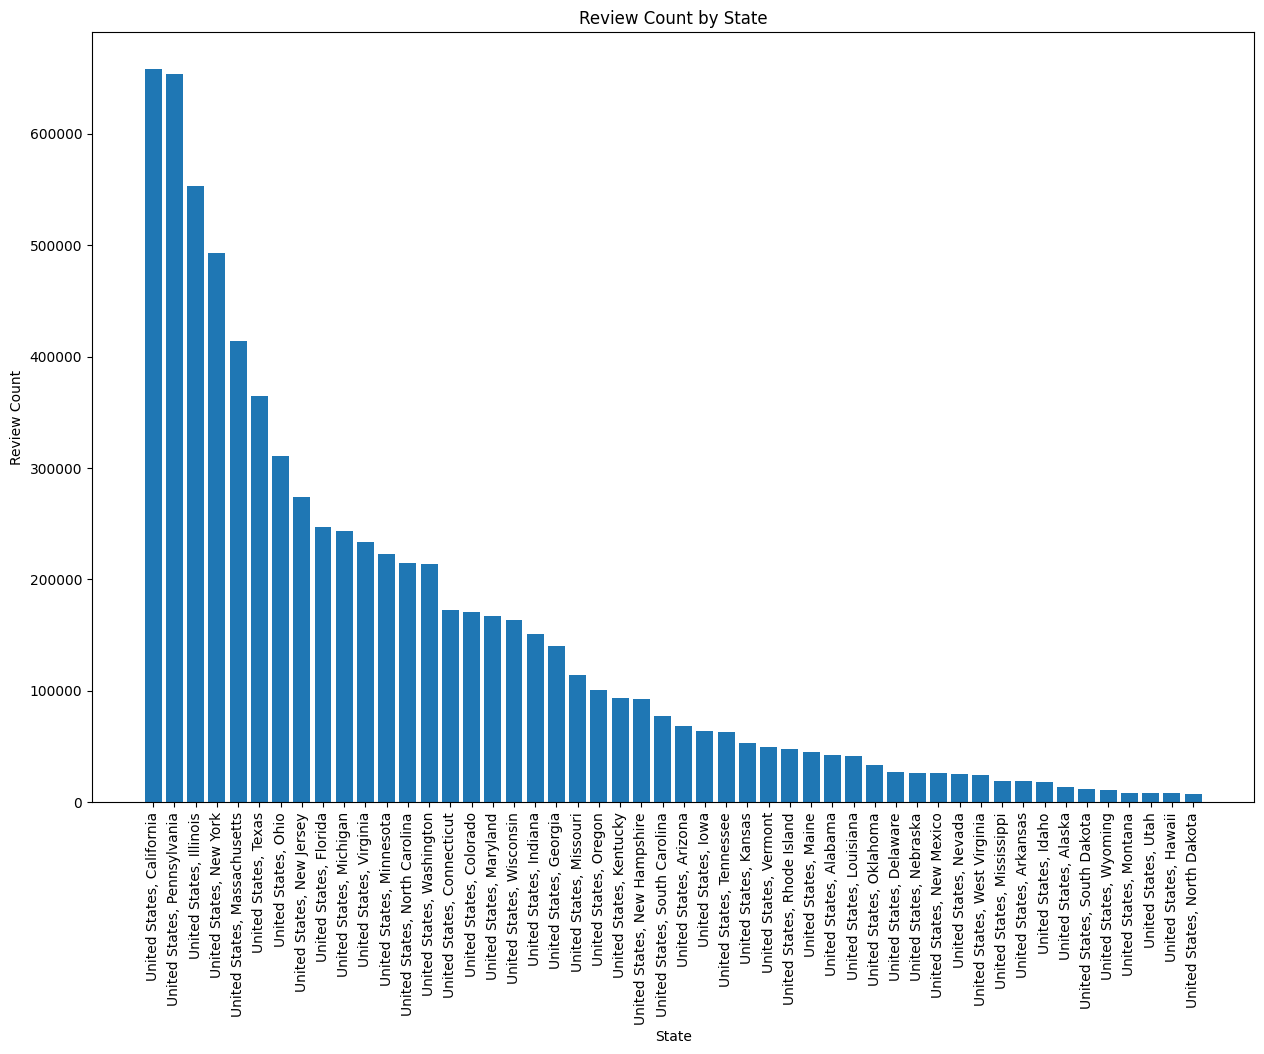

In [11]:
# Group by state and count the number of reviews
reviews_by_state = ba_usa_ratings.groupby('location').size().reset_index(name='review_count')
# Sort the data by review count in decreasing order
reviews_by_state = reviews_by_state.sort_values(by='review_count', ascending=False)

# Plot the data
plt.figure(figsize=(15, 10))
plt.bar(reviews_by_state['location'], reviews_by_state['review_count'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Review Count')
plt.title('Review Count by State')
plt.show()


In [12]:
# Remove the 'Label (Grouping)' column
removed_columns = ['Label (Grouping)']
census_data = census_data.drop(columns=removed_columns)

# Get the list of locations from ba_usa_users
locations = ba_usa_users['location'].unique()

# Keep only the columns whose name is a substring of any location
columns_to_keep = [col for col in census_data.columns if any(col in loc for loc in locations)]
removed_columns += [col for col in census_data.columns if col not in columns_to_keep]
census_data = census_data[columns_to_keep]

# Print the removed columns
print("Removed columns:", removed_columns)

# Function to convert string to int
def convert_to_int(value):
    if isinstance(value, str):
        value = value.split(' ')[0].replace(',', '')
    return int(value)

# Apply the conversion to all columns
for col in census_data.columns:
    census_data[col] = census_data[col].apply(convert_to_int)

census_data.head(10)

Removed columns: ['Label (Grouping)', 'District of Columbia', 'Puerto Rico']


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2171853,306967,2844526,1316299,13680081,2212898,1487891,405885,8989580,4088801,519508,667796,5296715,2795541,1336417,1233215,1927164,1964981,721830,2378814,2808254,4532233,2347201,1274719,2712729,482825,796793,1173814,614754,3553562,901388,8108103,4327528,317498,5127508,1664378,1675562,5567315,463388,2137683,363438,2812133,9977436,979709,322539,3364939,2885677,881917,2624358,261868
1,1267224,182989,2515504,720584,12814688,1838986,1308541,339111,8190007,3021219,465032,447466,4653006,2045946,848403,900963,1117530,1435286,251161,2073112,2566340,3256662,1638077,626138,1881796,251958,564143,1097550,343920,3373106,677019,6935786,2787646,182040,4074109,1091090,1328268,4316955,419181,1423307,200981,1845423,8280411,848925,106561,2458130,2379818,424443,1743597,162874
2,1040659,123286,2242637,506573,12051891,1617575,1259361,251189,7868477,2627344,343223,320550,4175309,1661795,542462,609736,779669,1211651,166873,1953855,2504170,2887280,1289593,352526,1519706,116980,409695,999698,265821,3286946,467906,6492127,2280125,122440,3424890,750131,1018953,3868362,416552,1203977,105088,1506349,7328804,753757,45774,2256078,2123384,289445,1378190,61697
3,226565,59703,272867,214011,762797,221411,49180,87922,321530,393875,121809,126916,477697,384151,305941,291227,337861,223635,84288,119257,62170,369382,348484,273612,362090,134978,154448,97852,78099,86160,209113,443659,507521,59600,649219,340959,309315,448593,2629,219330,95893,339074,951607,95168,60787,202052,256434,134998,365407,101177
4,904629,123978,329022,595715,865393,373912,179350,66774,799573,1067582,54476,220330,643709,749595,488014,332252,809634,529695,470669,305702,241914,1275571,709124,648581,830933,230867,232650,76264,270834,180456,224369,1172317,1539882,135458,1053399,573288,347294,1250360,44207,714376,162457,966710,1697025,130784,215978,906809,505859,457474,880761,98994
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
total_population = census_data.iloc[0]

In [14]:
# Calculate the total number of users before removal
total_users_before = len(ba_usa_users)

# Filter out users with 0 reviews
ba_usa_users_filtered = ba_usa_users[ba_usa_users['nbr_reviews'] > 0]

# Calculate the total number of users after removal
total_users_after = len(ba_usa_users_filtered)

# Calculate the number of users removed
users_removed = total_users_before - total_users_after

# Calculate the percentage of users removed
percentage_removed = (users_removed / total_users_before) * 100

# Print the number of users removed and the percentage
print(f"Total users removed: {users_removed}")
print(f"Percentage of users removed: {percentage_removed:.2f}%")

# Continue with the analysis using ba_usa_users_filtered
ba_usa_users_filtered.head(10)


Total users removed: 59343
Percentage of users removed: 52.41%


,Unnamed: 0,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
4,7,1866,23,rochefortchris.697017,RochefortChris,1.349172e+09,"United States, North Carolina"
5,8,1131,188,okcnittany.144868,OKCNittany,1.182766e+09,"United States, Oklahoma"
6,9,9987,16,jaydoc.265507,jaydoc,1.226488e+09,"United States, Kansas"
7,10,4078,127,ejimhof.5743,ejimhof,1.081764e+09,"United States, Pennsylvania"
8,11,2329,5,graduatedcashew.730089,GraduatedCashew,1.366884e+09,"United States, California"
9,12,264,95,brewdude1982.691169,brewdude1982,1.345802e+09,"United States, North Carolina"
10,13,2314,1990,agentmunky.409755,AgentMunky,1.262084e+09,"United States, New York"
11,15,732,14,byofb.537281,BYOFB,1.292065e+09,"United States, Wisconsin"


KeyboardInterrupt: 

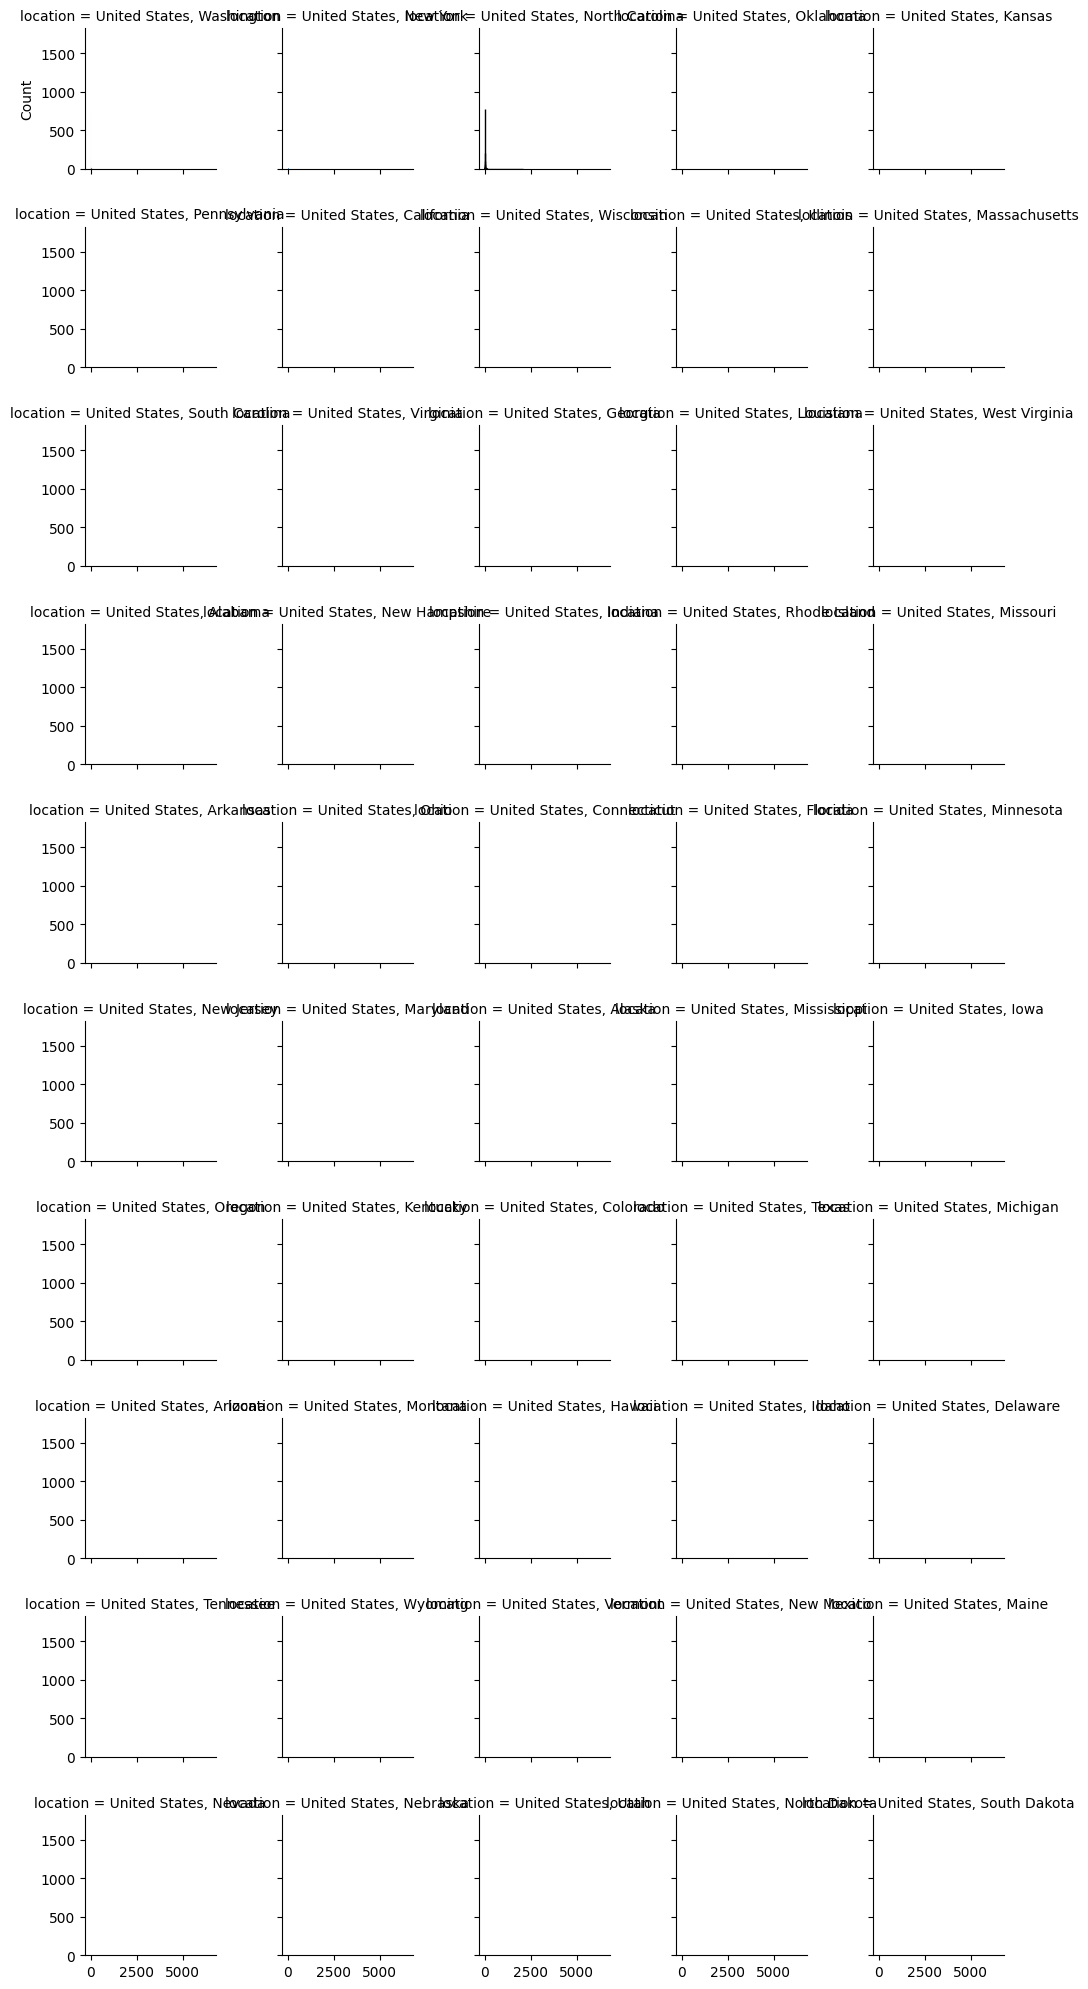

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid for the boxplot
g = sns.FacetGrid(ba_usa_users_filtered, col="location", col_wrap=5, height=2, aspect=1).map(sns.histplot, 'nbr_reviews')

# Set x-axis to log-log scale
plt.xscale('log')
plt.yscale('log')

# Add titles and adjust layout
g.set_titles("{col_name}")
g.tight_layout()
plt.show()

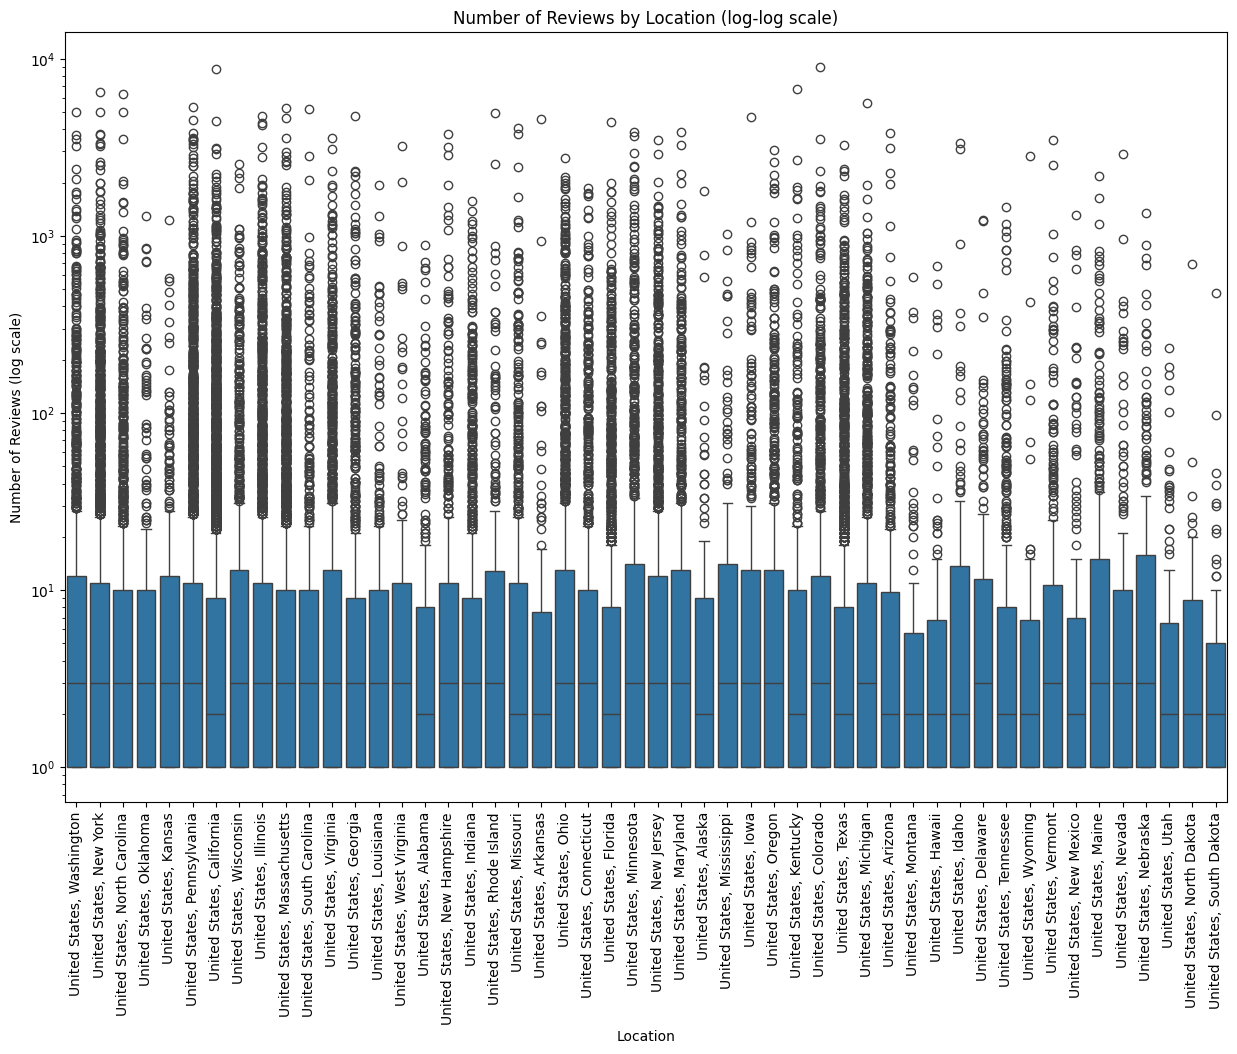

In [17]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(x='location', y='nbr_reviews', data=ba_usa_users_filtered)

# Set x-axis and y-axis to log-log scale
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Number of Reviews (log scale)')
plt.title('Number of Reviews by Location (log-log scale)')
plt.show()

In [23]:
# Identify outliers based on the number of reviews
Q1 = ba_usa_users_filtered['nbr_reviews'].quantile(0.25)
Q3 = ba_usa_users_filtered['nbr_reviews'].quantile(0.75)
IQR = Q3 - Q1
outliers = ba_usa_users_filtered[(ba_usa_users_filtered['nbr_reviews'] < (Q1 - 1.5 * IQR)) | (ba_usa_users_filtered['nbr_reviews'] > (Q3 + 1.5 * IQR))]

# Calculate the total number of reviews by outliers in each state
outliers_reviews_by_state = outliers.groupby('location')['nbr_reviews'].sum().reset_index(name='outlier_review_count')

# Calculate the total number of reviews in each state
total_reviews_by_state = ba_usa_users_filtered.groupby('location')['nbr_reviews'].sum().reset_index(name='total_review_count')

# Merge the dataframes
reviews_ratio = pd.merge(total_reviews_by_state, outliers_reviews_by_state, on='location', how='left').fillna(0)

# Calculate the ratio of reviews by outliers to the total number of reviews in each state
reviews_ratio['outlier_review_ratio'] = reviews_ratio['outlier_review_count'] / reviews_ratio['total_review_count']

# Add the number of outliers for each state
outliers_count_by_state = outliers.groupby('location').size().reset_index(name='outlier_count')

# Merge the dataframes
reviews_ratio = pd.merge(reviews_ratio, outliers_count_by_state, on='location', how='left').fillna(0)

# Calculate the total number of users in each state
total_users_by_state = ba_usa_users_filtered.groupby('location').size().reset_index(name='total_user_count')

# Merge the dataframes
reviews_ratio = pd.merge(reviews_ratio, total_users_by_state, on='location', how='left').fillna(0)

# Calculate the ratio of outliers to the total number of users in each state
reviews_ratio['outlier_user_ratio'] = reviews_ratio['outlier_count'] / reviews_ratio['total_user_count']

# Calculate entropy for each state
def entropy(x):
    p = x / x.sum()
    return -np.sum(p * np.log2(p))

entropy_by_state = ba_usa_users_filtered.groupby('location')['nbr_reviews'].apply(lambda x: entropy(x)).reset_index(name='entropy')

# Merge the entropy data with reviews_ratio
reviews_ratio = pd.merge(reviews_ratio, entropy_by_state, on='location', how='left').fillna(0)

# Print the number of reviewers that are outliers
num_outliers = len(outliers)
print(f"Number of reviewers that are outliers: {num_outliers}")

# Display the ratio of reviews by outliers in each state along with the number of outliers, their reviews, and user ratio
reviews_ratio[['location', 'outlier_review_ratio', 'outlier_count', 'outlier_review_count', 'total_review_count', 'outlier_user_ratio', 'total_user_count']]

# Calculate the hypothetical entropy for each state
reviews_ratio['hypothetical_entropy'] = reviews_ratio['total_user_count'].apply(lambda x: np.log2(x) if x > 0 else 0)

# Calculate the ratio between the actual entropy and the hypothetical entropy
reviews_ratio['entropy_ratio'] = reviews_ratio['entropy'] / reviews_ratio['hypothetical_entropy']

# order by the entropy
reviews_ratio = reviews_ratio.sort_values(by='entropy', ascending=False)

# Display the updated dataframe
reviews_ratio[['location', 'outlier_review_ratio', 'outlier_count', 'outlier_review_count', 'total_review_count', 'outlier_user_ratio', 'total_user_count', 'entropy', 'hypothetical_entropy', 'entropy_ratio']]

Number of reviewers that are outliers: 8723


,location,outlier_review_ratio,outlier_count,outlier_review_count,total_review_count,outlier_user_ratio,total_user_count,entropy,hypothetical_entropy,entropy_ratio
4,"United States, California",0.898423,862,171748,191166,0.146176,5897,9.190035,12.525765,0.733690
37,"United States, Pennsylvania",0.935878,660,188920,201864,0.167428,3942,8.502176,11.944712,0.711794
31,"United States, New York",0.923492,586,143059,154911,0.166053,3529,8.344757,11.785044,0.708080
12,"United States, Illinois",0.922091,504,125716,136338,0.161383,3123,8.276944,11.608717,0.712994
20,"United States, Massachusetts",0.924260,517,122080,132084,0.166559,3104,8.213287,11.599913,0.708047
42,"United States, Texas",0.902796,378,77199,85511,0.143945,2626,8.164372,11.358651,0.718780
34,"United States, Ohio",0.931856,391,99539,106818,0.178947,2185,8.074785,11.093418,0.727890
21,"United States, Michigan",0.882853,292,56673,64193,0.144698,2018,7.934113,10.978710,0.722682
8,"United States, Florida",0.884359,295,56660,64069,0.133545,2209,7.913900,11.109178,0.712375
29,"United States, New Jersey",0.926055,313,71710,77436,0.178043,1758,7.732982,10.779719,0.717364


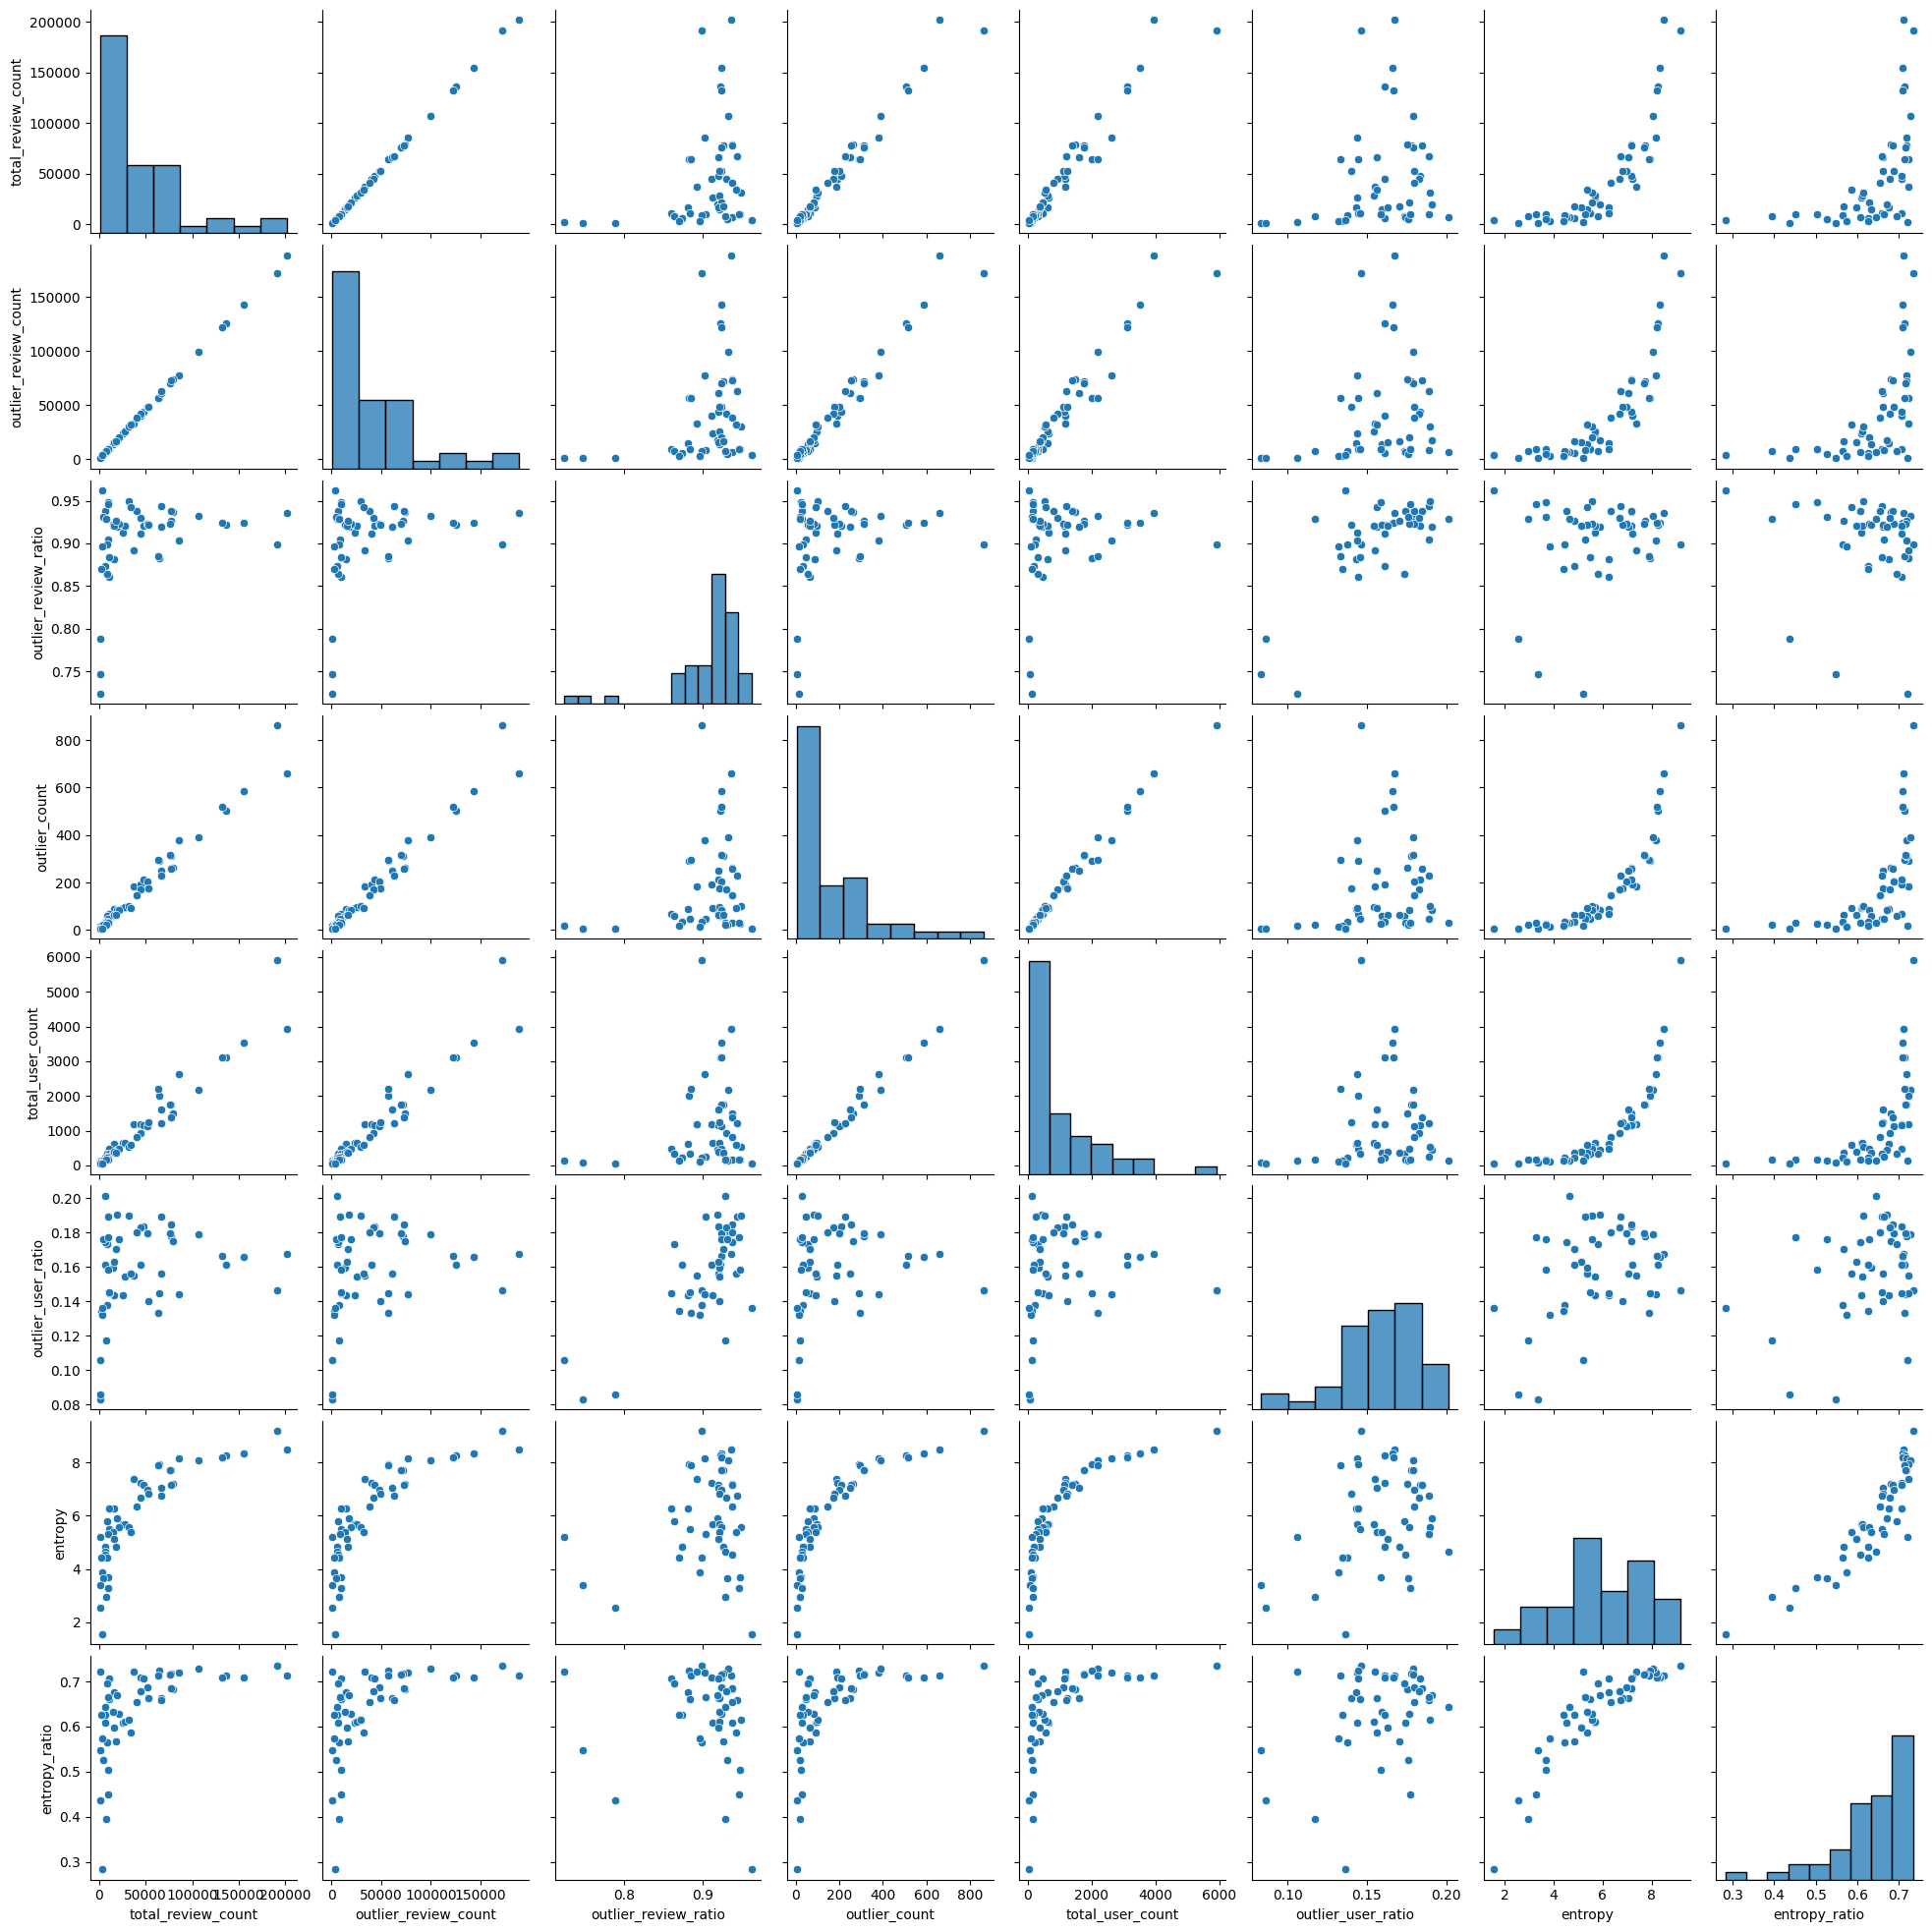

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the pair plot
pair_plot_data = reviews_ratio[['total_review_count', 'outlier_review_count', 'outlier_review_ratio', 'outlier_count', 'total_user_count', 'outlier_user_ratio', 'entropy', 'entropy_ratio']]

# Create the pair plot
sns.pairplot(pair_plot_data)
plt.show()

In [25]:
from scipy.stats import entropy

# Function to calculate entropy
def calculate_entropy(data):
    value, counts = np.unique(data, return_counts=True)
    return entropy(counts, base=2)

# Group by state and calculate entropy for nbr_reviews
entropy_by_state = ba_usa_users_filtered.groupby('location')['nbr_reviews'].apply(calculate_entropy).reset_index(name='entropy')

# Display the entropy values
entropy_by_state

,location,entropy
0,"United States, Alabama",3.945854
1,"United States, Alaska",3.617489
2,"United States, Arizona",4.081443
3,"United States, Arkansas",3.545167
4,"United States, California",4.250194
5,"United States, Colorado",4.422652
6,"United States, Connecticut",4.306531
7,"United States, Delaware",4.058429
8,"United States, Florida",4.086517
9,"United States, Georgia",4.127344


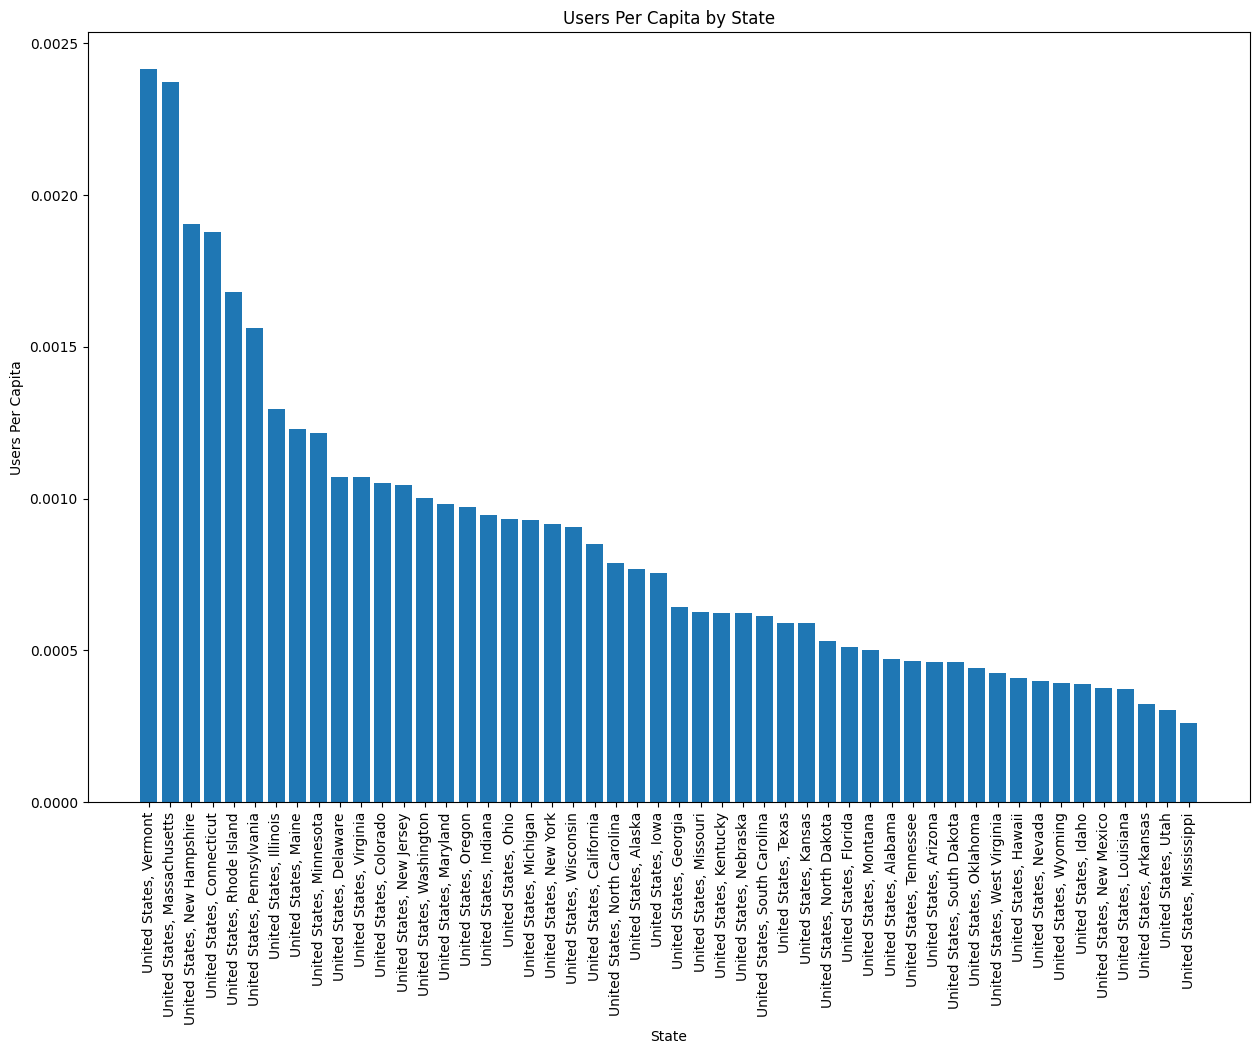

In [27]:
# Group by location and count the number of users
users_by_state = ba_usa_users.groupby('location').size().reset_index(name='user_count')

# Calculate users per capita
users_by_state['users_per_capita'] = users_by_state.apply(lambda row: row['user_count'] / total_population[row['location'].split(', ')[1]], axis=1)

# Sort the data by users per capita in decreasing order
users_by_state = users_by_state.sort_values(by='users_per_capita', ascending=False)

# Plot the data
plt.figure(figsize=(15, 10))
plt.bar(users_by_state['location'], users_by_state['users_per_capita'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Users Per Capita')
plt.title('Users Per Capita by State')
plt.show()

In [28]:
def get_reviews_from_state(state):
    """
    Get reviews from a specific state.

    Parameters:
    state (str): The state to filter reviews by.

    Returns:
    pd.DataFrame: A dataframe containing reviews from the specified state.
    """
    return ba_usa_ratings[ba_usa_ratings['location'].str.contains(state, case=False, na=False)]

# Example usage:
state_reviews = get_reviews_from_state('California')
state_reviews.head()

,Unnamed: 0,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,user_name_nan,abv_nan,appearance_nan,aroma_nan,palate_nan,taste_nan,overall_nan,location
8,11,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1366884000,GraduatedCashew,graduatedcashew.730089,0.0,0.0,0.0,0.0,0.0,3.00,0,0,1,1,1,1,1,"United States, California"
131,146,St. Patrick's Best,20842,Strangford Lough Brewing Company Ltd,10093,English Bitter,4.2,1268132400,Mosstrooper,mosstrooper.235403,3.5,3.5,3.0,4.0,3.5,3.65,0,0,0,0,0,0,0,"United States, California"
145,187,Caffrey's Irish Ale,825,Thomas Caffrey Brewing Co.,297,Irish Red Ale,3.8,1059991200,beerguy101,beerguy101.137,3.0,2.5,3.0,2.5,3.0,2.68,0,0,0,0,0,0,0,"United States, California"
153,198,Caffrey's Irish Ale,825,Thomas Caffrey Brewing Co.,297,Irish Red Ale,3.8,1032861600,zerk,zerk.422,4.0,3.0,2.5,3.0,3.5,3.11,0,0,0,0,0,0,0,"United States, California"
162,209,Caffrey's Irish Ale,825,Thomas Caffrey Brewing Co.,297,Irish Red Ale,3.8,986292000,Todd,todd.2,3.5,3.5,4.0,4.0,4.5,3.95,0,0,0,0,0,0,0,"United States, California"


In [29]:
# Filter ba_beers to only include beers reviewed by usa_users
usa_user_ids = ba_usa_users['user_id'].unique()
usa_reviews = ba_usa_ratings[ba_usa_ratings['user_id'].isin(usa_user_ids)]
usa_beer_ids = usa_reviews['beer_id'].unique()
usa_beers = ba_beers[ba_beers['beer_id'].isin(usa_beer_ids)]

# Get unique beer styles
unique_beer_styles = usa_beers['style'].unique()
unique_beer_styles, len(unique_beer_styles)

(array(['Euro Pale Lager', 'English Pale Ale', 'English Bitter',
        'Irish Red Ale', 'American Stout', 'Milk / Sweet Stout',
        'American Double / Imperial IPA', 'American IPA',
        'Irish Dry Stout', 'Munich Helles Lager', 'English Brown Ale',
        'English India Pale Ale (IPA)', 'American Pale Ale (APA)',
        'Foreign / Export Stout', 'American Double / Imperial Stout',
        'American Blonde Ale', 'Hefeweizen', 'English Stout',
        'American Black Ale', 'English Porter', 'American Pale Wheat Ale',
        'Kölsch', 'Altbier', 'Smoked Beer', 'Bière de Garde',
        'Oatmeal Stout', 'Rye Beer', 'English Dark Mild Ale',
        'Russian Imperial Stout', 'American Amber / Red Ale',
        'Berliner Weissbier', 'Belgian Strong Pale Ale',
        'Saison / Farmhouse Ale', 'Schwarzbier', 'Dunkelweizen',
        'Fruit / Vegetable Beer', 'American Pale Lager', 'Baltic Porter',
        'Czech Pilsener', 'Extra Special / Strong Bitter (ESB)', 'Witbier',
        '

### What interests us for each user

- vector of interest (average grade for each beer type, median grade for each beer type)
- total number of reviews
- time active

In [25]:
from IPython.display import display

# Calculate the mean rating for each beer type for each user
mean_rating_by_user = ba_usa_ratings.groupby(['user_id', 'style'])['rating'].mean().unstack(fill_value=0)

# Calculate the total number of reviews for each user
total_reviews_by_user = ba_usa_ratings.groupby('user_id')['rating'].count()

# Calculate the mean rating for each beer type for each user
mean_rating_by_user = ba_usa_ratings.groupby(['user_id', 'style'])['rating'].mean().unstack(fill_value=0)

# Calculate the distribution of reviews for each user for each beer type
reviews_per_type_by_user = ba_usa_ratings.groupby(['user_id', 'style'])['rating'].count().unstack(fill_value=0)
reviews_per_type_by_user = reviews_per_type_by_user.apply(lambda x: x / x.sum(), axis=1)

# Calculate the distribution of reviews for each beer type
total_reviews_by_beer = ba_usa_ratings.groupby('style')['rating'].count()

# merge the data
reviews_ratio = mean_rating_by_user.merge(total_reviews_by_user, on='user_id', how='left').reset_index()
display(reviews_ratio.head())

print(type(reviews_ratio))
# Calculate the mean rating for each beer type
mean_rating_by_beer = ba_usa_ratings.groupby('style')['rating'].mean()

,user_id,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,American Double / Imperial IPA,American Double / Imperial Pilsner,American Double / Imperial Stout,American IPA,American Malt Liquor,American Pale Ale (APA),American Pale Lager,American Pale Wheat Ale,American Porter,American Stout,American Strong Ale,American Wild Ale,Baltic Porter,Belgian Dark Ale,Belgian IPA,Belgian Pale Ale,Belgian Strong Dark Ale,Belgian Strong Pale Ale,Berliner Weissbier,Bière de Champagne / Bière Brut,Bière de Garde,Black & Tan,Bock,Braggot,California Common / Steam Beer,Chile Beer,Cream Ale,Czech Pilsener,Doppelbock,Dortmunder / Export Lager,Dubbel,Dunkelweizen,Eisbock,English Barleywine,English Bitter,English Brown Ale,English Dark Mild Ale,English India Pale Ale (IPA),English Pale Ale,English Pale Mild Ale,English Porter,English Stout,English Strong Ale,Euro Dark Lager,Euro Pale Lager,Euro Strong Lager,Extra Special / Strong Bitter (ESB),Faro,Flanders Oud Bruin,Flanders Red Ale,Foreign / Export Stout,Fruit / Vegetable Beer,German Pilsener,Gose,Gueuze,Happoshu,Hefeweizen,Herbed / Spiced Beer,Irish Dry Stout,Irish Red Ale,Japanese Rice Lager,Kellerbier / Zwickelbier,Kristalweizen,Kvass,Kölsch,Lambic - Fruit,Lambic - Unblended,Light Lager,Low Alcohol Beer,Maibock / Helles Bock,Milk / Sweet Stout,Munich Dunkel Lager,Munich Helles Lager,Märzen / Oktoberfest,Oatmeal Stout,Old Ale,Pumpkin Ale,Quadrupel (Quad),Rauchbier,Roggenbier,Russian Imperial Stout,Rye Beer,Sahti,Saison / Farmhouse Ale,Schwarzbier,Scotch Ale / Wee Heavy,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier,rating
0,--dom--.709199,0.0,0.0,3.954,0.0,4.458333,3.98,0.0,0.0,0.0,4.262439,0.0,4.25,4.187,0.0,4.040909,0.0,4.125,4.23,0.0,4.333333,0.00,0.0,0.0,0.0,4.0,3.916667,4.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,4.405,0.0,3.58,4.25,0.0,4.25,0.0,0.0,0.0,3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.89,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.25,0.0,0.0,0.0,4.25,4.016667,0.0,4.62,0.0,0.0,4.288333,4.213333,0.0,4.21,0.0,4.26,0.0,0.0,0.0,3.89,0.0,0.0,0.0,0.0,3.75,165
1,--nomad--.931404,0.0,0.0,0.000,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,5.000,0.0,0.000000,0.0,0.000,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1
2,-1x.1006554,0.0,0.0,0.000,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,4.58,0.000,0.0,0.000000,0.0,0.000,4.57,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,4.450000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,4
3,-blast-tyrant-.1105240,0.0,0.0,0.000,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,0.000,0.0,0.000000,0.0,0.000,0.00,0.0,0.000000,4.84,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,2
4,-bobweaver-.785842,0.0,0.0,0.000,0.0,0.000000,0.00,0.0,0.0,0.0,4.687500,0.0,0.00,5.000,0.0,0.000000,0.0,0.000,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

<class 'pandas.core.frame.DataFrame'>


,Component 1,Component 2,Component 3
Altbier,0.105435,0.047780,-0.065077
American Adjunct Lager,0.086814,0.026318,-0.184282
American Amber / Red Ale,0.101448,-0.141399,-0.043675
American Amber / Red Lager,0.098645,0.026851,-0.173988
American Barleywine,0.109843,-0.098998,0.101048
American Black Ale,0.105040,-0.113831,0.033794
American Blonde Ale,0.106962,-0.037556,-0.064995
American Brown Ale,0.108028,-0.117445,-0.029104
American Dark Wheat Ale,0.078024,0.133819,-0.008961
American Double / Imperial IPA,0.067190,-0.157077,0.065191


Explained variance ratio for each component:
Component 1: 0.3712
Component 2: 0.0415
Component 3: 0.0320


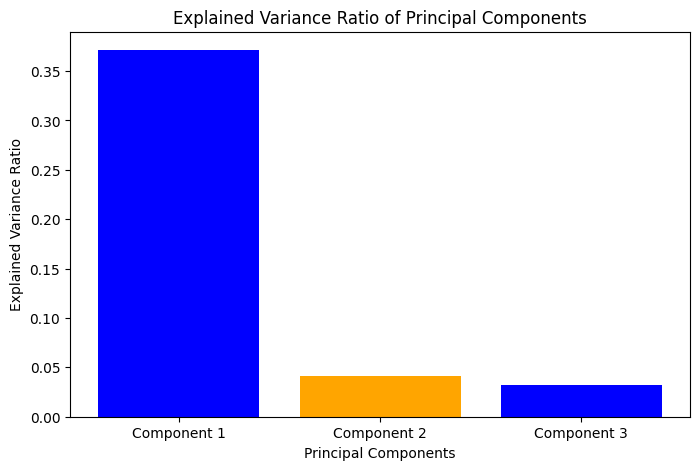

,Component 1,Component 2,Component 3
rating,0.112832,0.207850,0.111790
Belgian Pale Ale,0.112372,-0.065827,-0.003110
Old Ale,0.111281,-0.064007,0.104402
Baltic Porter,0.110977,-0.025968,0.069038
Oatmeal Stout,0.110962,-0.092614,-0.005470
Czech Pilsener,0.110668,-0.005507,-0.115267
Extra Special / Strong Bitter (ESB),0.110209,-0.003302,-0.092482
English Brown Ale,0.109982,-0.033945,-0.099926
American Barleywine,0.109843,-0.098998,0.101048
Doppelbock,0.109790,-0.030304,-0.030599


In [31]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML

user_ratings_df = reviews_ratio.copy().drop(columns='user_id')
n_components = 3
scaled_data = StandardScaler().fit_transform(user_ratings_df)


# Print the weights of each component compared to the original dimensions
X_reduced_pca = PCA(n_components=n_components).fit(scaled_data)
components = X_reduced_pca.components_

# Create a DataFrame to map original column names to component values
component_df = pd.DataFrame(components.T, index=user_ratings_df.columns, columns=[f'Component {i+1}' for i in range(n_components)])

# Display the DataFrame using IPython display
display(HTML(component_df.to_html()))

# Calculate the explained variance ratio
explained_variance_ratio = X_reduced_pca.explained_variance_ratio_

# Print the explained variance ratio for each component
print("Explained variance ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio:.4f}")

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar([f'Component {i+1}' for i in range(n_components)], explained_variance_ratio, color=['blue', 'orange'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# # Perform PCA on the scaled data
# plt.figure(figsize=(10, 7))
# plt.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], s=50)
# plt.title('PCA reduced data')
# plt.xlabel('First principal component')
# plt.ylabel('Second principal component')
# plt.show()
# Order the components by weight in the first component
ordered_components = component_df.sort_values(by='Component 1', ascending=False)

# Display the ordered components
display(HTML(ordered_components.to_html()))
